<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_07/Lecture_01/Challenge/Solution_Challenge_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics

In this notebook we will explore evaluating a model using Sci-kit Learn (AKA sklearn)

# The Data

Today we will use a very commonly used dataset called 'The Iris Dataset'.  This dataset is so common it is included in the sklearn package.

Each row is an iris flower and features are measurements of that flower including

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

The task to to classify each iris as Iris Setosa, Iris Vericolour, or Iris Virginica.

## This is a multiclass problem because there are 3 possible classes!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix

In [ ]:
# Define a function to evaluate models

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

# Load the Data

In [ ]:
# Load Iris Dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Check for missing or duplicated values

In [ ]:
# Check for duplicates and missing values
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


Duplicates: 1


# Drop Duplicates

We can drop duplicates without leaking data.  However, if we had missing data we would need to impute after the train test split to avoid leaking data from the testing data into the training data.

In [ ]:
#Remove duplicates
df = df.drop_duplicates()

print('duplicates remaining:', df.duplicated().sum())

duplicates remaining: 0


# Check Class Balance

In [ ]:
#Check how many samples of each class are present
df['target'].value_counts()

0    50
1    50
2    49
Name: target, dtype: int64

# Validation Split

In [ ]:
#Split the data into training and validation sets
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model the Data

Use a pipeline to scale and fit a model and make predictions

Create a pipeline with StandardScaler and DecisionTreeClassifier
Fit the pipeline on your training data.

Save the model's predictions on X_train and X_test in variables.

In [ ]:
# Instantatiate scaler and model
scaler = StandardScaler()

knn = KNeighborsClassifier()

#create and fit pipeline
pipe = make_pipeline(scaler, knn)
pipe.fit(X_train, y_train)

#save predictions
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

# Model Evaluation

In [ ]:
print('Training Metrics\n')
evaluate_classification(y_train, train_preds, average='macro')
print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, test_preds, average='macro')

Training Metrics

Accuracy: 0.963963963963964 
Recall: 0.9644259644259644 
Precision: 0.9660859465737515 
F1 Score: 0.9648148148148149


Testing Metrics

Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0 
F1 Score: 1.0


Recall, precision, and f1 score don't work unless we identify a positive class, or tell the function what kind of average we want.  In the latter case it will return the average score across classes.

If this were a binary classification they would assume we want scores for class 1

In [ ]:
print('Classification Report for Training Set')
train_report = classification_report(y_train, train_preds)
print(train_report)

print('Confusion Matrix for Training Set')
train_conf_mat = confusion_matrix(y_train, train_preds)
print(train_conf_mat)

print('\n\n')

print('Classification Report for Testing Set')

test_report = classification_report(y_test, test_preds)
print(test_report)

print('Confusion Matrix for Testing Set')
test_conf_mat = confusion_matrix(y_test, test_preds)
print(test_conf_mat)

Classification Report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.93      0.97      0.95        39
           2       0.97      0.92      0.94        37

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.96      0.96      0.96       111

Confusion Matrix for Training Set
[[35  0  0]
 [ 0 38  1]
 [ 0  3 34]]



Classification Report for Testing Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix for Testing Set
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# Plot Confusion Matrix to Get Complete Picture

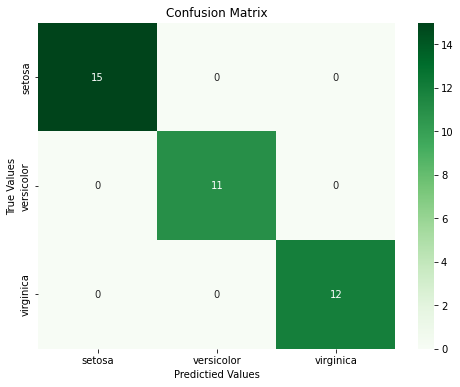

In [ ]:
plt.figure(figsize=(8,6))
heatmap(test_conf_mat, xticklabels=iris.target_names, 
        yticklabels=iris.target_names, cmap='Greens',
        annot=True)
plt.ylabel('True Values')
plt.xlabel('Predictied Values')
plt.title('Confusion Matrix')
plt.show()

It looks like my classifier is doing very well.

The test set is also very small, so it's hard to tell how well this model would do on new iris data.  I'd like to do more testing with more data to get a better picture of this model's performance.

# BONUS

Try tuning your model and/or try other models to get the best test score.